In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
def load_and_resize_image(image_path, new_size=(800, 800)):
    image = cv2.imread(image_path)  
    image_resized = cv2.resize(image, new_size)  
    image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB) 
    return image_rgb, image_resized
image_rgb, image_resized = load_and_resize_image('data.jpg')

In [4]:
def draw_grid(image, grid_size=(3, 3), thickness=2):
    height, width = image.shape[:2]
    grid_h, grid_w = height // grid_size[0], width // grid_size[1]
    for i in range(1, grid_size[0]):
        cv2.line(image, (0, i * grid_h), (width, i * grid_h), (255, 0, 0), thickness)
    for j in range(1, grid_size[1]):
        cv2.line(image, (j * grid_w, 0), (j * grid_w, height), (255, 0, 0), thickness)
    return image, grid_h, grid_w
grid_image, grid_h, grid_w = draw_grid(image_rgb.copy())

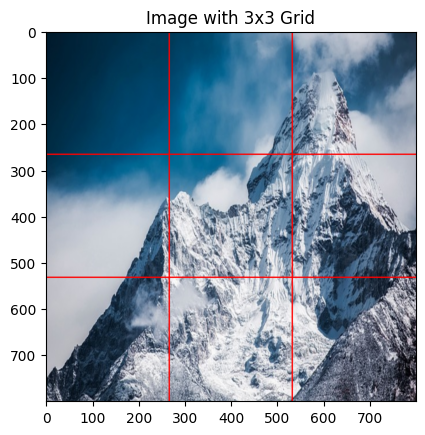

In [5]:
plt.imshow(grid_image)
plt.title("Image with 3x3 Grid")
plt.show()

In [8]:
click_points = []
clicked_grids = set()
def get_grid_cell(x, y, grid_w, grid_h):
    grid_x = x // grid_w
    grid_y = y // grid_h
    return (grid_x, grid_y)
def click_event(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        grid_cell = get_grid_cell(x, y, grid_w, grid_h)
        clicked_grids.add(grid_cell)
        click_points.append(grid_cell)
        print(f"Click at ({x}, {y}) falls in grid {grid_cell}")
        print(f"Clicked grid cells: {click_points}")
cv2.imshow('Click to Set Password',image_resized)
cv2.setMouseCallback('Click to Set Password', click_event)
while len(click_points) < 4:
    cv2.waitKey(1)
cv2.destroyAllWindows()

Click at (483, 376) falls in grid (1, 1)
Clicked grid cells: [(1, 1)]
Click at (236, 383) falls in grid (0, 1)
Clicked grid cells: [(1, 1), (0, 1)]
Click at (293, 642) falls in grid (1, 2)
Clicked grid cells: [(1, 1), (0, 1), (1, 2)]
Click at (296, 642) falls in grid (1, 2)
Clicked grid cells: [(1, 1), (0, 1), (1, 2), (1, 2)]


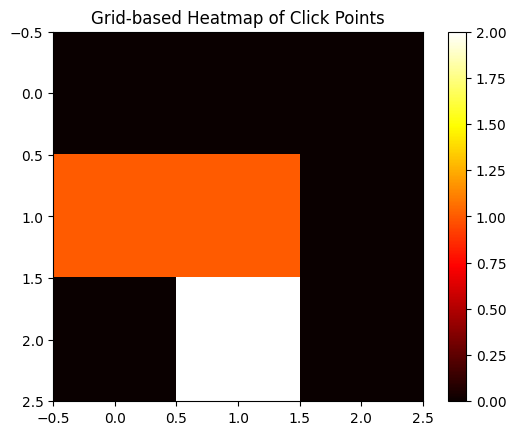

In [9]:
grid_size = (3, 3)
grid_heatmap = np.zeros((grid_size[0], grid_size[1]), dtype=np.float32)
for grid_x, grid_y in click_points:
    grid_heatmap[grid_y, grid_x] += 1
plt.imshow(grid_heatmap, cmap='hot', interpolation='nearest')
plt.title("Grid-based Heatmap of Click Points")
plt.colorbar()
plt.show()


In [10]:
click_points_verification = []
def click_event_verification(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        grid_cell = get_grid_cell(x, y, grid_w, grid_h)
        click_points_verification.append(grid_cell)
        print(f"Verification click at ({x}, {y}) in grid {grid_cell}")
cv2.imshow('Re-enter Password', image_resized)
cv2.setMouseCallback('Re-enter Password', click_event_verification)
while len(click_points_verification) < 4:
    cv2.waitKey(1)
cv2.destroyAllWindows()


Verification click at (540, 172) in grid (2, 0)
Verification click at (412, 426) in grid (1, 1)
Verification click at (174, 445) in grid (0, 1)
Verification click at (404, 443) in grid (1, 1)


In [11]:
if click_points == click_points_verification:
    print("User authenticated successfully!")
else:
    print("Authentication failed! Passwords do not match.")

Authentication failed! Passwords do not match.


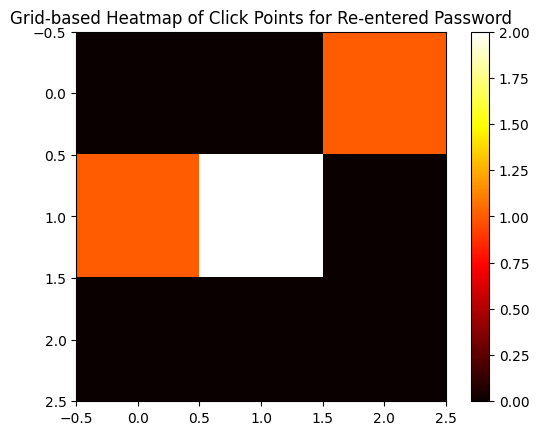

In [13]:
grid_size = (3, 3)
grid_heatmap = np.zeros((grid_size[0], grid_size[1]), dtype=np.float32)
for grid_x, grid_y in click_points_verification:
    grid_heatmap[grid_y, grid_x] += 1
plt.imshow(grid_heatmap, cmap='hot', interpolation='nearest')
plt.title("Grid-based Heatmap of Click Points for Re-entered Password")
plt.colorbar()
plt.show()